In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
%config InlineBackend.figure_format = 'retina'

import generate_rect_xz_scan as grs
import optical_rect_process as orp
import os
import scipy.interpolate as interp
import scipy.ndimage as ndimage

In [2]:
base = '/Users/settwi/grad_school/glesener/geant/impress/analysis/double-peak-analysis/optical-rectangle/'
containing_folders = ['5mm-packed-sipms', '5mm-with-reflector-3mm-spacing']
containing_folders = [os.path.join(base, f) for f in containing_folders]

labels = ['0.2mm spacing', '3mm spacing, reflector betwixt']
save_dir = os.getenv('HOME') + '/Desktop/'

<IPython.core.display.Javascript object>


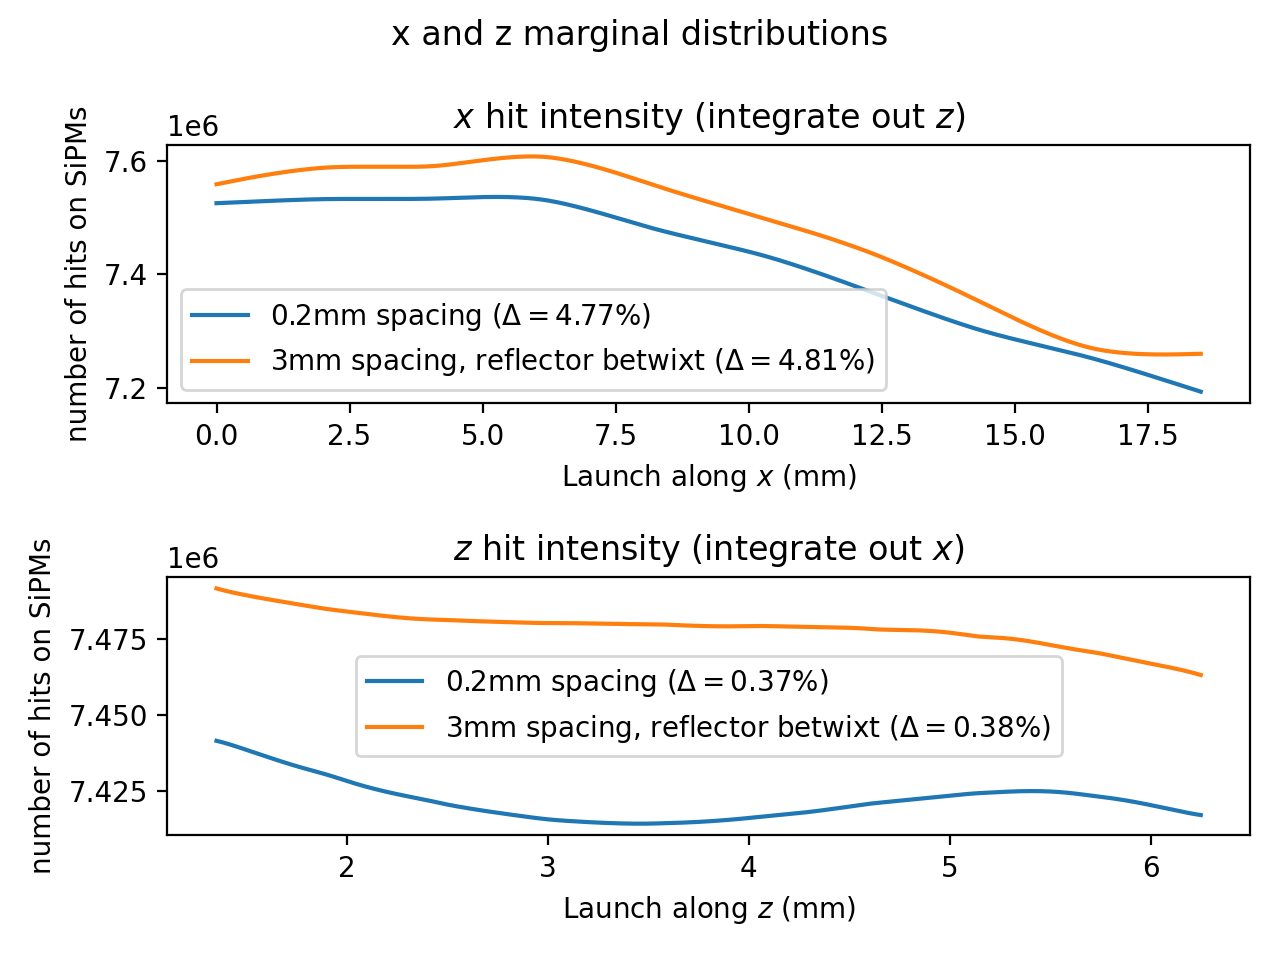

<IPython.core.display.Javascript object>


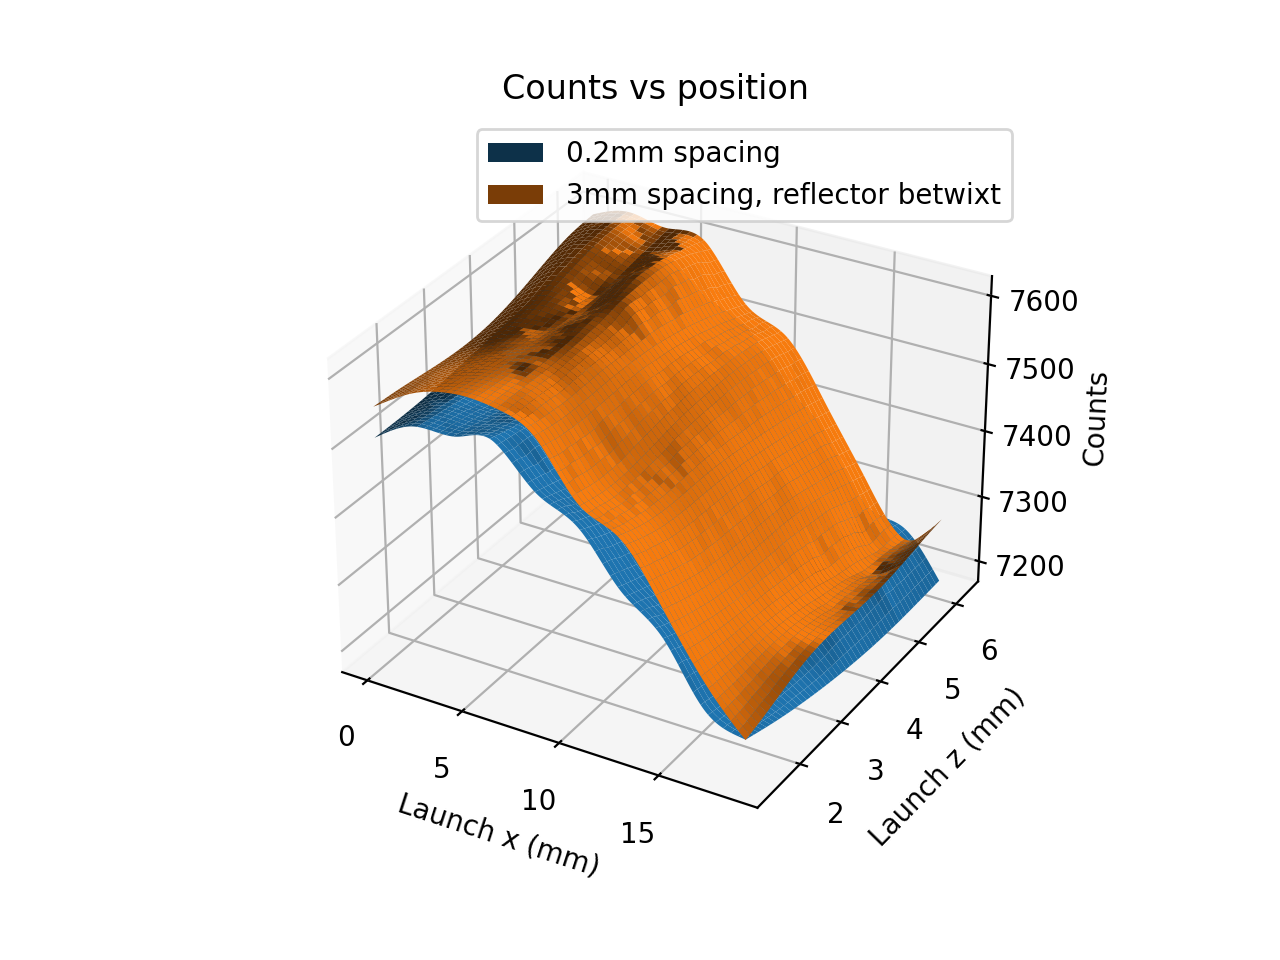

In [3]:
save = True
marg_fig, marg_axs = plt.subplots(nrows=2, ncols=1)
joint_fig, joint_ax = plt.subplots(subplot_kw={'projection': '3d'})

for cont_fold, label in zip(containing_folders, labels):
    data = orp.extract_optical_data(cont_fold)
    reshaped_dict = orp.resample_optical_data(data)
    orp.plot_marginal_xz(
        reshaped_dict, fig=marg_fig, axs=marg_axs,
        label=label,
    )

    orp.plot_2d_distr(reshaped_dict, fig=joint_fig, ax=joint_ax, label=label)

for ax in marg_axs: ax.legend()
joint_ax.legend()
if save:
    marg_fig.savefig(save_dir + 'marginal.png', dpi=300)
    joint_fig.savefig(save_dir + 'joint.png', dpi=300)